In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
#import more_itertools as mit
from pylab import *
from builtins import sum
from spylind import spyIVP as svp
from spylind import spylind as spl 
from spylind import utils as ut
import sympy as sm
import qutip as q
from functools import reduce

def S(inp):
    """Make an object sympy friendly
    """
    try:
        obj = inp.full()
    except:
        obj = inp
    return sm.sympify(obj)

def dot(arr1, arr2):
    return reduce(lambda x,y: x+y, map(lambda val: val[0]*val[1], zip(arr1, arr2)))
sm.init_printing() # this is needed to display equations nicely

S(q.sigmax())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Tensorflow not accessible: No module named 'backend_tf'
No pretty printing stuff (probably because no Pandas)


⎡ 0   1.0⎤
⎢        ⎥
⎣1.0   0 ⎦

In [4]:
spl.getRhoS(2, base_symbol = "R")

⎡R_{0|0}  R_{0|1}⎤
⎢                ⎥
⎢_______         ⎥
⎣R_{0|1}  R_{1|1}⎦

In [12]:

BvS = [BxS, ByS, BzS]
sigmavS = [M(op) for op in [q.sigmax(), q.sigmay(), q.sigmaz()]]
dot(BvS, sigmavS)

NameError: name 'M' is not defined

In [6]:
B_vS = sm.Matrix([BxS, ByS, BzS])
B_vS.dot(Sig_vS)

NameError: name 'BxS' is not defined

In [15]:
# Symbols used. It's a good idea to define real=True if the symbols are in fact real
BxS, ByS, BzS = sm.symbols("B_x, B_y, B_z", real=True) # Real and imaginary parts of the driving field
BvS = [BxS, ByS, BzS]
tS, T1nS, gnS = sm.symbols('t, T_1n, g_n', real=True) # The symbol used for time
rho_n_S = spl.getRhoS(2, "\\rho")

K1 = q.basis(2,0)
K2 = q.basis(2,1)


sigmav = [q.sigmax(), q.sigmay(), q.sigmaz()]
# Hamiltonian description. Qutip operators with sympy coeficients.
H0 = K2*K2.dag() # Excited state is detuned from the ground state
c_opL = [ [1/sm.sqrt(T1nS), q.sigmap() ],
         [1, (BxS*sm.Matrix(q.sigmax()) + ByS*sm.Matrix(q.sigmay()) + BzS*sm.Matrix(q.sigmaz()) )/sm.sqrt(BxS**2 + ByS**2 + BzS**2)],
        ] # 1/T1 * |1><2|, i.e. decay from state |2> -> |1> 
#
H_desc = [H0, [BxS*gnS, q.sigmax()], [ByS*gnS, q.sigmay()], [BzS*gnS, q.sigmaz()] ] #H= H0 +  Er*sigmax + Ei*sigmay
evoD_n, exMag_n=spl.makeMESymb(H_desc, c_opL=c_opL, 
                  e_opL = [q.sigmax(), q.sigmay(), q.sigmaz()], 
                  rhoS = rho_n_S
                 )
display("Bloch equations:")
#display(pretty_eq)
display(exMag_n)
#evoD

'Bloch equations:'

In [8]:
Kx_m, Kx_p = q.sigmax().eigenstates()[1]
Ky_m, Ky_p = q.sigmay().eigenstates()[1]
Kz_p, Kz_m = q.basis(2,0), q.basis(2,1)

Pmp_up_ops = [Kx_p*Kx_m.dag(),
       Ky_p*Ky_m.dag(),
       Kz_p*Kz_m.dag()]
Pmp_dn_ops = [Kx_m*Kx_p.dag(),
       Ky_m*Ky_p.dag(),
       Kz_m*Kz_p.dag()]

MxS, MyS, MzS = sm.symbols("Mx, My, Mz")

dot(MxS)

TypeError: dot() missing 1 required positional argument: 'arr2'

In [9]:
display(Kx_p)
Ky_p

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678+0.j        ]
 [ 0.        -0.70710678j]]

In [104]:
display((q.sigmay() + 1j*q.sigmaz())/2*Kx_m*1j)
display((q.sigmaz() + 1j*q.sigmax())/2*Ky_m)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678+0.j        ]
 [ 0.        -0.70710678j]]

In [92]:
q.sigmap()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [93]:
display(K1*K2.dag())
display((q.sigmax() + 1j*q.sigmay())/2 )
display((q.sigmax() - 1j*q.sigmay())/2 )

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [73]:
obj=sm.sympify(K1.full())
type(obj)

sympy.tensor.array.dense_ndim_array.ImmutableDenseNDimArray

In [78]:
q.sigmax(), q.sigmay()

(Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0. 1.]
  [1. 0.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]])

In [79]:
q.sigmap()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

# Alkali

## Interaction:
* Magnetic: Magnetization makes a field seen by the other species
* Spin-exchange: Chance of swapping spins between species. But due to different numbers of species, it looks more like a pumping along the polarisation axis. E.g. $<\mathbf{\sigma}> . <\mathbf{S}>$

$\sigma^+_x

In [13]:
# Symbols used. It's a good idea to define real=True if the symbols are in fact real
M = sm.Matrix
tS, T1eS, T2eS, geS = sm.symbols('t, T_1e, T_2e, g_e', real=True) # The symbol used for time
rho_e_S = spl.getRhoS(2, "R")

K1 = q.basis(2,0)
K2 = q.basis(2,1)

# Hamiltonian description. Qutip operators with sympy coeficients.
H0 = K2*K2.dag() # Excited state is detuned from the ground state
c_opL = [ [1/sm.sqrt(T1nS), q.sigmap() ],
         [1/sm.sqrt(T2eS), (BxS*M(q.sigmax()) + ByS*M(q.sigmay()) + BzS*M(q.sigmaz()) )/sm.sqrt(BxS**2 + ByS**2 + BzS**2)],
        ] # 1/T1 * |1><2|, i.e. decay from state |2> -> |1> 
#
H_desc = [H0, [BxS*geS, q.sigmax()], [ByS*geS, q.sigmay()], [BzS*geS, q.sigmaz()] ] #H= H0 +  Er*sigmax + Ei*sigmay
evoD_e, exMag_e, pretty_eq=spl.makeMESymb(H_desc, c_opL=c_opL, e_opL = [q.sigmax(), q.sigmay(), q.sigmaz()], rhoS = spl.getRhoS(2, "R"), bReturnPrettyEquation=True)
display("Bloch equations:")
#display(pretty_eq)
#evoD_e
display(exMag_e)

'Bloch equations:'

In [14]:
T = q.tensor
# Symbols used. It's a good idea to define real=True if the symbols are in fact real
tS, T1S = sm.symbols('t, T_1', real=True) # The symbol used for time
BxS, ByS, BzS = sm.symbols("B_x, B_y, B_z", real=True) # Real and imaginary parts of the driving field
ID_A,ID_B = q.identity(2), q.identity(2)
K1_A = T(q.basis(2,0),ID_B)
K2_A = T(q.basis(2,1),ID_B)

K1_B = T(ID_A, q.basis(2,0))
K2_B = T(ID_A, q.basis(2,1))

H_Bx = T(q.sigmax(), ID_B)  + T(ID_A, q.sigmax())

# Hamiltonian description. Qutip operators with sympy coeficients.
H0 = K2*K2.dag() # Excited state is detuned from the ground state
c_opL = [ [1/sm.sqrt(T1S), q.sigmap() ],
         [1, (BxS*sm.Matrix(q.sigmax()) + ByS*sm.Matrix(q.sigmay()) + BzS*sm.Matrix(q.sigmaz()) )/sm.sqrt(BxS**2 + ByS**2 + BzS**2)],
        ] # 1/T1 * |1><2|, i.e. decay from state |2> -> |1> 
#
H_desc = [H0, [BxS, q.sigmax()], [ByS, q.sigmay()], [BzS, q.sigmaz()] ] #H= H0 +  Er*sigmax + Ei*sigmay
evoD, ex_vals, pretty_eq=spl.makeMESymb(H_desc, c_opL=c_opL, e_opL = [], bReturnPrettyEquation=True)
display("Bloch equations:")
display(pretty_eq)

'Bloch equations:'

<IPython.core.display.Latex object>

In [15]:
spl.getRhoS(2, "R")

⎡R_{0|0}  R_{0|1}⎤
⎢                ⎥
⎢_______         ⎥
⎣R_{0|1}  R_{1|1}⎦

In [16]:
sys.set_initial_state?

Object `sys.set_initial_state` not found.


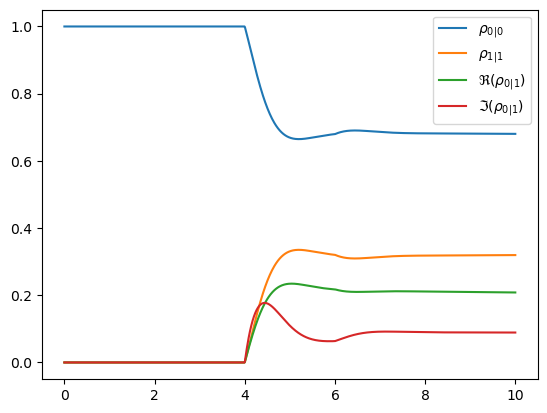

In [17]:

sys = svp.ODESys(evoD, trans_dims ={}, driving_syms=[BxS, ByS, BzS], tSym=tS)
sys.set_driving({BxS: lambda t: 0.0 if t<4 else 1, 
                 ByS: lambda t: .1 if t<10 and t>6 else 0.0001,
                 BzS: lambda t: 1 }
               ) #
sys.set_initial_state(np.array([1,0,0]) )
model = sys.setup_model({T1S: 10}) # can substitute in any undefined parameters here

# And finally run it
tSteps = linspace(0,10,1000)
out = model.integrate(tSteps)

#Plot results (with nice legend)
figure()
for arr, sym in zip(out.swapaxes(0,1), sys.symsD.state):
    if sym.is_real:
        plot(tSteps,  arr.real, label =f"${sym}$" )
    else:
        plot(tSteps,  arr.real, label =f"$\Re({sym})$" )
        plot(tSteps,  arr.imag, label =f"$\Im({sym})$" )
legend()